In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/-Practice/main/HousePrices.csv")
df.shape

(1460, 81)

In [24]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [27]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [28]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

In [29]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [30]:
df.drop(['Id','MSZoning','Alley','Street','LandContour','Utilities','Neighborhood','Condition1','Condition2'], axis=1, inplace=True)

In [31]:
df.head(5)

MSSubClass  LotFrontage  LotArea LotShape LotConfig LandSlope BldgType  \
0          60         65.0     8450      Reg    Inside       Gtl     1Fam   
1          20         80.0     9600      Reg       FR2       Gtl     1Fam   
2          60         68.0    11250      IR1    Inside       Gtl     1Fam   
3          70         60.0     9550      IR1    Corner       Gtl     1Fam   
4          60         84.0    14260      IR1       FR2       Gtl     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd             9        Typ           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0       2003.0          RFn           2         548         TA         TA   
1       1976.0          RFn           2         460         TA         TA   
2       2001.0          RFn           2         608         TA         TA   
3       1998.0          Unf      

In [32]:
lotshape= pd.crosstab(index=df["LotShape"],
                                  columns="count")
lotconfig= pd.crosstab(index=df["LotConfig"],
                                  columns="count")
landslope = pd.crosstab(index=df["LandSlope"],
                                  columns="count")
bldgtype= pd.crosstab(index=df["BldgType"],
                                  columns="count")
housestyle = pd.crosstab(index=df["HouseStyle"],
                                  columns="count")
roofstyle = pd.crosstab(index=df["RoofStyle"],
                                  columns="count")
roofmatl = pd.crosstab(index=df["RoofMatl"],
                                  columns="count")
exterior1st =pd.crosstab(index=df["Exterior1st"],
                                  columns="count")
exterior2nd= pd.crosstab(index=df["Exterior2nd"],
                                  columns="count")
masvnrtype = pd.crosstab(index=df["MasVnrType"],
                                  columns="count")
exterqual =pd.crosstab(index=df["ExterQual"],
                                  columns="count")    
extercond = pd.crosstab(index=df["ExterCond"],
                                  columns="count")     
foundation = pd.crosstab(index=df["Foundation"],
                                  columns="count")
bsmtqual = pd.crosstab(index=df["BsmtQual"],
                                  columns="count")
bsmtcond = pd.crosstab(index=df["BsmtCond"],
                                  columns="count")
bsmtexposure=pd.crosstab(index=df["BsmtExposure"],
                                  columns="count")
bsmtfintype1 = pd.crosstab(index=df["BsmtFinType1"],
                                  columns="count")
bsmtfintype2=pd.crosstab(index=df["BsmtFinType2"],
                                  columns="count")
heating = pd.crosstab(index=df["Heating"],
                                  columns="count")
heatinqc = pd.crosstab(index=df["HeatingQC"],
                                  columns="count")
centralair = pd.crosstab(index=df["CentralAir"],
                                  columns="count")
electrical = pd.crosstab(index=df["Electrical"],
                                  columns="count")
kitchenqual = pd.crosstab(index=df["KitchenQual"],
                                  columns="count")
functional = pd.crosstab(index=df["Functional"],
                                  columns="count")
fireplacequ = pd.crosstab(index=df["FireplaceQu"],
                                  columns="count")
garagetype = pd.crosstab(index=df["GarageType"],
                                  columns="count")
garagefinish = pd.crosstab(index=df["GarageFinish"],
                                  columns="count")
garagequal= pd.crosstab(index=df["GarageQual"],
                                  columns="count")
garagecond=pd.crosstab(index=df["GarageCond"],
                                  columns="count")
paveddrive=pd.crosstab(index=df["PavedDrive"],
                                  columns="count")
poolqc=pd.crosstab(index=df["PoolQC"],
                                  columns="count")
fence=pd.crosstab(index=df["Fence"],
                                  columns="count")
miscfeature=pd.crosstab(index=df["MiscFeature"],
                                  columns="count")
saletype=pd.crosstab(index=df["SaleType"],
                                  columns="count")
salecondition=pd.crosstab(index=df["SaleCondition"],
                                  columns="count")

In [33]:
print(lotshape)
print("\n")
print(lotconfig)
print("\n")
print(landslope)
print("\n")
print(bldgtype)
print("\n")
print(housestyle)
print("\n")
print(roofstyle)
print("\n")
print(roofmatl)
print("\n")
print(exterior1st)
print("\n")
print(exterior2nd)
print("\n")
print(masvnrtype)
print("\n")
print(exterqual)
print("\n")
print(extercond)
print("\n")
print(foundation)
print("\n")
print(bsmtqual)
print("\n")
print(bsmtcond)
print("\n")
print(bsmtexposure)
print("\n")
print(bsmtfintype1)
print("\n")
print(bsmtfintype2)
print("\n")
print(heating)
print("\n")
print(heatinqc)
print("\n")
print(centralair)
print("\n")
print(electrical)
print("\n")
print(kitchenqual)
print("\n")
print(functional)
print("\n")
print(fireplacequ)
print("\n")
print(garagetype)
print("\n")
print(garagequal)
print("\n")
print(garagecond)
print("\n")
print(paveddrive)
print("\n")
print(poolqc)
print("\n")
print(fence)
print("\n")
print(miscfeature)
print("\n")
print(saletype)
print("\n")
print(salecondition)


col_0     count
LotShape       
IR1         484
IR2          41
IR3          10
Reg         925


col_0      count
LotConfig       
Corner       263
CulDSac       94
FR2           47
FR3            4
Inside      1052


col_0      count
LandSlope       
Gtl         1382
Mod           65
Sev           13


col_0     count
BldgType       
1Fam       1220
2fmCon       31
Duplex       52
Twnhs        43
TwnhsE      114


col_0       count
HouseStyle       
1.5Fin        154
1.5Unf         14
1Story        726
2.5Fin          8
2.5Unf         11
2Story        445
SFoyer         37
SLvl           65


col_0      count
RoofStyle       
Flat          13
Gable       1141
Gambrel       11
Hip          286
Mansard        7
Shed           2


col_0     count
RoofMatl       
ClyTile       1
CompShg    1434
Membran       1
Metal         1
Roll          1
Tar&Grv      11
WdShake       5
WdShngl       6


col_0        count
Exterior1st       
AsbShng         20
AsphShn          1
BrkComm          2
Brk

In [34]:
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')


print(df['MSSubClass'].dtype)
print('\n')
print(pd.crosstab(index=df["MSSubClass"],  # Make a crosstab
                              columns="count")) 

category


col_0       count
MSSubClass       
20            536
30             69
40              4
45             12
50            144
60            299
70             60
75             16
80             58
85             20
90             52
120            87
160            63
180            10
190            30


In [35]:

df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)

df['GarageType'].fillna('No Garage', inplace=True)


df['GarageYrBlt'].fillna(0, inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)


df['PoolQC'].fillna('No Pool', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)

df['FireplaceQu'].fillna('No Fireplace', inplace=True)
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [36]:
import datetime as dt


current_year = int(dt.datetime.now().year)


building_age = current_year - df['YearBuilt']

remodelled_age = current_year - df['YearRemodAdd']


df['building_age'] = building_age
df['remodelled_age'] = remodelled_age


df.head(5)

MSSubClass  LotFrontage  LotArea LotShape LotConfig LandSlope BldgType  \
0         60         65.0     8450      Reg    Inside       Gtl     1Fam   
1         20         80.0     9600      Reg       FR2       Gtl     1Fam   
2         60         68.0    11250      IR1    Inside       Gtl     1Fam   
3         70         60.0     9550      IR1    Corner       Gtl     1Fam   
4         60         84.0    14260      IR1       FR2       Gtl     1Fam   

  HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story           7           5       2003          2003     Gable   
1     1Story           6           8       1976          1976     Gable   
2     2Story           7           5       2001          2002     Gable   
3     2Story           7           5       1915          1970     Gable   
4     2Story           8           5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd             7        Typ           1            Gd     Detchd   
4          Gd             9        Typ           1            TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0       2003.0          RFn           2         548         TA         TA   
1       1976.0          RFn           2         460         TA         TA   
2       2001.0          RFn           2         608         TA         TA   
3       1998.0          Unf           

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['LotShape'])


for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)

ie = label_encoder.fit_transform(df['LotShape'])

oe = OneHotEncoder(sparse=False)
ie = ie.reshape(len(ie),1)

oe = oe.fit_transform(ie)
print(oe)

IR1 --> 0
IR2 --> 1
IR3 --> 2
Reg --> 3
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [38]:
one_hot_enoded_variables = pd.get_dummies(df['LotShape'],prefix='LotShape')
print(one_hot_enoded_variables)

      LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg
0                0             0             0             1
1                0             0             0             1
2                1             0             0             0
3                1             0             0             0
4                1             0             0             0
5                1             0             0             0
6                0             0             0             1
7                1             0             0             0
8                0             0             0             1
9                0             0             0             1
10               0             0             0             1
11               1             0             0             0
12               0             1             0             0
13               1             0             0             0
14               1             0             0             0
15               0      

In [39]:
one_hot_enoded_variables = pd.get_dummies(df['LotConfig'],prefix='LotConfig')
print(one_hot_enoded_variables)

      LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                    0                  0              0              0   
1                    0                  0              1              0   
2                    0                  0              0              0   
3                    1                  0              0              0   
4                    0                  0              1              0   
5                    0                  0              0              0   
6                    0                  0              0              0   
7                    1                  0              0              0   
8                    0                  0              0              0   
9                    1                  0              0              0   
10                   0                  0              0              0   
11                   0                  0              0              0   
12                   0   

In [40]:
one_hot_enoded_variables = pd.get_dummies(df['BldgType'],prefix='BldgType')
print(one_hot_enoded_variables)

      BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0                 1                0                0               0   
1                 1                0                0               0   
2                 1                0                0               0   
3                 1                0                0               0   
4                 1                0                0               0   
5                 1                0                0               0   
6                 1                0                0               0   
7                 1                0                0               0   
8                 1                0                0               0   
9                 0                1                0               0   
10                1                0                0               0   
11                1                0                0               0   
12                1                0               

In [41]:
one_hot_enoded_variables = pd.get_dummies(df['HouseStyle'],prefix='HouseStyle')
print(one_hot_enoded_variables)

      HouseStyle_1.5Fin  HouseStyle_1.5Unf  HouseStyle_1Story  \
0                     0                  0                  0   
1                     0                  0                  1   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
5                     1                  0                  0   
6                     0                  0                  1   
7                     0                  0                  0   
8                     1                  0                  0   
9                     0                  1                  0   
10                    0                  0                  1   
11                    0                  0                  0   
12                    0                  0                  1   
13                    0                  0                  1   
14                    0  

In [42]:
one_hot_enoded_variables = pd.get_dummies(df['RoofStyle'],prefix='RoofStyle')
print(one_hot_enoded_variables)

      RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
0                  0                1                  0              0   
1                  0                1                  0              0   
2                  0                1                  0              0   
3                  0                1                  0              0   
4                  0                1                  0              0   
5                  0                1                  0              0   
6                  0                1                  0              0   
7                  0                1                  0              0   
8                  0                1                  0              0   
9                  0                1                  0              0   
10                 0                0                  0              1   
11                 0                0                  0              1   
12                 0     

In [43]:
one_hot_enoded_variables = pd.get_dummies(df['RoofMatl'],prefix='RoofMatl')
print(one_hot_enoded_variables)

      RoofMatl_ClyTile  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
0                    0                 1                 0               0   
1                    0                 1                 0               0   
2                    0                 1                 0               0   
3                    0                 1                 0               0   
4                    0                 1                 0               0   
5                    0                 1                 0               0   
6                    0                 1                 0               0   
7                    0                 1                 0               0   
8                    0                 1                 0               0   
9                    0                 1                 0               0   
10                   0                 1                 0               0   
11                   0                 1                 0      

In [44]:
one_hot_enoded_variables = pd.get_dummies(df['Exterior1st'],prefix='Exterior1st')
print(one_hot_enoded_variables)

      Exterior1st_AsbShng  Exterior1st_AsphShn  Exterior1st_BrkComm  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
5                       0                    0                    0   
6                       0                    0                    0   
7                       0                    0                    0   
8                       0                    0                    0   
9                       0                    0                    0   
10                      0                    0                    0   
11                      0                    0                    0   
12                      0                    0                    0   
13    

In [45]:
one_hot_enoded_variables = pd.get_dummies(df['Exterior2nd'],prefix='Exterior2nd')
print(one_hot_enoded_variables)

      Exterior2nd_AsbShng  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
5                       0                    0                    0   
6                       0                    0                    0   
7                       0                    0                    0   
8                       0                    0                    0   
9                       0                    0                    0   
10                      0                    0                    0   
11                      0                    0                    0   
12                      0                    0                    0   
13    

In [46]:
one_hot_enoded_variables = pd.get_dummies(df['MasVnrType'],prefix='MasVnrType')
print(one_hot_enoded_variables)

      MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone
0                     0                   1                0                 0
1                     0                   0                1                 0
2                     0                   1                0                 0
3                     0                   0                1                 0
4                     0                   1                0                 0
5                     0                   0                1                 0
6                     0                   0                0                 1
7                     0                   0                0                 1
8                     0                   0                1                 0
9                     0                   0                1                 0
10                    0                   0                1                 0
11                    0                   0         

In [47]:
one_hot_enoded_variables = pd.get_dummies(df['ExterQual'],prefix='ExterQual')
print(one_hot_enoded_variables)

      ExterQual_Ex  ExterQual_Fa  ExterQual_Gd  ExterQual_TA
0                0             0             1             0
1                0             0             0             1
2                0             0             1             0
3                0             0             0             1
4                0             0             1             0
5                0             0             0             1
6                0             0             1             0
7                0             0             0             1
8                0             0             0             1
9                0             0             0             1
10               0             0             0             1
11               1             0             0             0
12               0             0             0             1
13               0             0             1             0
14               0             0             0             1
15               0      

In [48]:
one_hot_enoded_variables = pd.get_dummies(df['ExterCond'],prefix='ExterCond')
print(one_hot_enoded_variables)

      ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA
0                0             0             0             0             1
1                0             0             0             0             1
2                0             0             0             0             1
3                0             0             0             0             1
4                0             0             0             0             1
5                0             0             0             0             1
6                0             0             0             0             1
7                0             0             0             0             1
8                0             0             0             0             1
9                0             0             0             0             1
10               0             0             0             0             1
11               0             0             0             0             1
12               0       

In [49]:
one_hot_enoded_variables = pd.get_dummies(df['Foundation'],prefix='Foundaion')
print(one_hot_enoded_variables)

      Foundaion_BrkTil  Foundaion_CBlock  Foundaion_PConc  Foundaion_Slab  \
0                    0                 0                1               0   
1                    0                 1                0               0   
2                    0                 0                1               0   
3                    1                 0                0               0   
4                    0                 0                1               0   
5                    0                 0                0               0   
6                    0                 0                1               0   
7                    0                 1                0               0   
8                    1                 0                0               0   
9                    1                 0                0               0   
10                   0                 1                0               0   
11                   0                 0                1               0   

In [50]:
one_hot_enoded_variables = pd.get_dummies(df['BsmtQual'],prefix='BsmtQual')
print(one_hot_enoded_variables)

      BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_No Basement  BsmtQual_TA
0               0            0            1                     0            0
1               0            0            1                     0            0
2               0            0            1                     0            0
3               0            0            0                     0            1
4               0            0            1                     0            0
5               0            0            1                     0            0
6               1            0            0                     0            0
7               0            0            1                     0            0
8               0            0            0                     0            1
9               0            0            0                     0            1
10              0            0            0                     0            1
11              1            0            0         

In [51]:
one_hot_enoded_variables = pd.get_dummies(df['BsmtCond'],prefix='BsmtCond')
print(one_hot_enoded_variables)

      BsmtCond_Fa  BsmtCond_Gd  BsmtCond_No Basement  BsmtCond_Po  BsmtCond_TA
0               0            0                     0            0            1
1               0            0                     0            0            1
2               0            0                     0            0            1
3               0            1                     0            0            0
4               0            0                     0            0            1
5               0            0                     0            0            1
6               0            0                     0            0            1
7               0            0                     0            0            1
8               0            0                     0            0            1
9               0            0                     0            0            1
10              0            0                     0            0            1
11              0            0                     0

In [52]:
one_hot_enoded_variables = pd.get_dummies(df['BsmtExposure'],prefix='BsmtExposure')
print(one_hot_enoded_variables)

      BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                   0                0                0                1   
1                   0                1                0                0   
2                   0                0                1                0   
3                   0                0                0                1   
4                   1                0                0                0   
5                   0                0                0                1   
6                   1                0                0                0   
7                   0                0                1                0   
8                   0                0                0                1   
9                   0                0                0                1   
10                  0                0                0                1   
11                  0                0                0                1   
12          

In [53]:
one_hot_enoded_variables = pd.get_dummies(df['BsmtFinType1'],prefix='BsmtFinType1')
print(one_hot_enoded_variables)

      BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                    0                 0                 1                 0   
1                    1                 0                 0                 0   
2                    0                 0                 1                 0   
3                    1                 0                 0                 0   
4                    0                 0                 1                 0   
5                    0                 0                 1                 0   
6                    0                 0                 1                 0   
7                    1                 0                 0                 0   
8                    0                 0                 0                 0   
9                    0                 0                 1                 0   
10                   0                 0                 0                 0   
11                   0                 0

In [54]:
one_hot_enoded_variables = pd.get_dummies(df['BsmtFinType2'],prefix='BsmtFinType2')
print(one_hot_enoded_variables)

      BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
5                    0                 0                 0                 0   
6                    0                 0                 0                 0   
7                    0                 1                 0                 0   
8                    0                 0                 0                 0   
9                    0                 0                 0                 0   
10                   0                 0                 0                 0   
11                   0                 0

In [55]:
one_hot_enoded_variables = pd.get_dummies(df['Heating'],prefix='Heating')
print(one_hot_enoded_variables)

      Heating_Floor  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  \
0                 0             1             0             0             0   
1                 0             1             0             0             0   
2                 0             1             0             0             0   
3                 0             1             0             0             0   
4                 0             1             0             0             0   
5                 0             1             0             0             0   
6                 0             1             0             0             0   
7                 0             1             0             0             0   
8                 0             1             0             0             0   
9                 0             1             0             0             0   
10                0             1             0             0             0   
11                0             1             0     

In [56]:
one_hot_enoded_variables = pd.get_dummies(df['HeatingQC'],prefix='HeatingQC')
print(one_hot_enoded_variables)

      HeatingQC_Ex  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA
0                1             0             0             0             0
1                1             0             0             0             0
2                1             0             0             0             0
3                0             0             1             0             0
4                1             0             0             0             0
5                1             0             0             0             0
6                1             0             0             0             0
7                1             0             0             0             0
8                0             0             1             0             0
9                1             0             0             0             0
10               1             0             0             0             0
11               1             0             0             0             0
12               0       

In [57]:
one_hot_enoded_variables = pd.get_dummies(df['CentralAir'],prefix='CentralAir')
print(one_hot_enoded_variables)

      CentralAir_N  CentralAir_Y
0                0             1
1                0             1
2                0             1
3                0             1
4                0             1
5                0             1
6                0             1
7                0             1
8                0             1
9                0             1
10               0             1
11               0             1
12               0             1
13               0             1
14               0             1
15               0             1
16               0             1
17               0             1
18               0             1
19               0             1
20               0             1
21               0             1
22               0             1
23               0             1
24               0             1
25               0             1
26               0             1
27               0             1
28               0             1
29        

In [58]:
one_hot_enoded_variables = pd.get_dummies(df['KitchenQual'],prefix='KitchenQual')
print(one_hot_enoded_variables)

      KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA
0                  0               0               1               0
1                  0               0               0               1
2                  0               0               1               0
3                  0               0               1               0
4                  0               0               1               0
5                  0               0               0               1
6                  0               0               1               0
7                  0               0               0               1
8                  0               0               0               1
9                  0               0               0               1
10                 0               0               0               1
11                 1               0               0               0
12                 0               0               0               1
13                 0              

In [59]:
one_hot_enoded_variables = pd.get_dummies(df['Functional'],prefix='Functional')
print(one_hot_enoded_variables)

      Functional_Maj1  Functional_Maj2  Functional_Min1  Functional_Min2  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   
5                   0                0                0                0   
6                   0                0                0                0   
7                   0                0                0                0   
8                   0                0                1                0   
9                   0                0                0                0   
10                  0                0                0                0   
11                  0                0                0                0   
12          

In [60]:
one_hot_enoded_variables = pd.get_dummies(df['FireplaceQu'],prefix='FireplaceQu')
print(one_hot_enoded_variables)

      FireplaceQu_Ex  FireplaceQu_Fa  FireplaceQu_Gd  \
0                  0               0               0   
1                  0               0               0   
2                  0               0               0   
3                  0               0               1   
4                  0               0               0   
5                  0               0               0   
6                  0               0               1   
7                  0               0               0   
8                  0               0               0   
9                  0               0               0   
10                 0               0               0   
11                 0               0               1   
12                 0               0               0   
13                 0               0               1   
14                 0               1               0   
15                 0               0               0   
16                 0               0            

In [61]:
one_hot_enoded_variables = pd.get_dummies(df['GarageType'],prefix='GarageType')
print(one_hot_enoded_variables)

      GarageType_2Types  GarageType_Attchd  GarageType_Basment  \
0                     0                  1                   0   
1                     0                  1                   0   
2                     0                  1                   0   
3                     0                  0                   0   
4                     0                  1                   0   
5                     0                  1                   0   
6                     0                  1                   0   
7                     0                  1                   0   
8                     0                  0                   0   
9                     0                  1                   0   
10                    0                  0                   0   
11                    0                  0                   0   
12                    0                  0                   0   
13                    0                  1                   0   
14        

In [62]:
one_hot_enoded_variables = pd.get_dummies(df['GarageFinish'],prefix='GarageFinish')
print(one_hot_enoded_variables)

      GarageFinish_Fin  GarageFinish_No Garage  GarageFinish_RFn  \
0                    0                       0                 1   
1                    0                       0                 1   
2                    0                       0                 1   
3                    0                       0                 0   
4                    0                       0                 1   
5                    0                       0                 0   
6                    0                       0                 1   
7                    0                       0                 1   
8                    0                       0                 0   
9                    0                       0                 1   
10                   0                       0                 0   
11                   1                       0                 0   
12                   0                       0                 0   
13                   0                       0  

In [63]:
one_hot_enoded_variables = pd.get_dummies(df['GarageQual'],prefix='GarageQual')
print(one_hot_enoded_variables)

      GarageQual_Ex  GarageQual_Fa  GarageQual_Gd  GarageQual_No Garage  \
0                 0              0              0                     0   
1                 0              0              0                     0   
2                 0              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   
5                 0              0              0                     0   
6                 0              0              0                     0   
7                 0              0              0                     0   
8                 0              1              0                     0   
9                 0              0              1                     0   
10                0              0              0                     0   
11                0              0              0                     0   
12                0      

In [64]:
one_hot_enoded_variables = pd.get_dummies(df['GarageCond'],prefix='GarageCond')
print(one_hot_enoded_variables)

      GarageCond_Ex  GarageCond_Fa  GarageCond_Gd  GarageCond_No Garage  \
0                 0              0              0                     0   
1                 0              0              0                     0   
2                 0              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   
5                 0              0              0                     0   
6                 0              0              0                     0   
7                 0              0              0                     0   
8                 0              0              0                     0   
9                 0              0              0                     0   
10                0              0              0                     0   
11                0              0              0                     0   
12                0      

In [65]:
one_hot_enoded_variables = pd.get_dummies(df['PavedDrive'],prefix='PavedDrive')
print(one_hot_enoded_variables)

      PavedDrive_N  PavedDrive_P  PavedDrive_Y
0                0             0             1
1                0             0             1
2                0             0             1
3                0             0             1
4                0             0             1
5                0             0             1
6                0             0             1
7                0             0             1
8                0             0             1
9                0             0             1
10               0             0             1
11               0             0             1
12               0             0             1
13               0             0             1
14               0             0             1
15               0             0             1
16               0             0             1
17               0             0             1
18               0             0             1
19               0             0             1
20           

In [66]:
one_hot_enoded_variables = pd.get_dummies(df['PoolQC'],prefix='PoolQC')
print(one_hot_enoded_variables)

      PoolQC_Ex  PoolQC_Fa  PoolQC_Gd  PoolQC_No Pool
0             0          0          0               1
1             0          0          0               1
2             0          0          0               1
3             0          0          0               1
4             0          0          0               1
5             0          0          0               1
6             0          0          0               1
7             0          0          0               1
8             0          0          0               1
9             0          0          0               1
10            0          0          0               1
11            0          0          0               1
12            0          0          0               1
13            0          0          0               1
14            0          0          0               1
15            0          0          0               1
16            0          0          0               1
17            0          0  

In [67]:
one_hot_enoded_variables = pd.get_dummies(df['Fence'],prefix='Fence')
print(one_hot_enoded_variables)

      Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_No Fence
0               0           0            0           0               1
1               0           0            0           0               1
2               0           0            0           0               1
3               0           0            0           0               1
4               0           0            0           0               1
5               0           0            1           0               0
6               0           0            0           0               1
7               0           0            0           0               1
8               0           0            0           0               1
9               0           0            0           0               1
10              0           0            0           0               1
11              0           0            0           0               1
12              0           0            0           0               1
13    

In [68]:
one_hot_enoded_variables = pd.get_dummies(df['MiscFeature'],prefix='MiscFeature')
print(one_hot_enoded_variables)

      MiscFeature_Gar2  MiscFeature_None  MiscFeature_Othr  MiscFeature_Shed  \
0                    0                 1                 0                 0   
1                    0                 1                 0                 0   
2                    0                 1                 0                 0   
3                    0                 1                 0                 0   
4                    0                 1                 0                 0   
5                    0                 0                 0                 1   
6                    0                 1                 0                 0   
7                    0                 0                 0                 1   
8                    0                 1                 0                 0   
9                    0                 1                 0                 0   
10                   0                 1                 0                 0   
11                   0                 1

In [69]:
one_hot_enoded_variables = pd.get_dummies(df['SaleType'],prefix='SaleType')
print(one_hot_enoded_variables)

      SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                0             0             0               0   
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
5                0             0             0               0   
6                0             0             0               0   
7                0             0             0               0   
8                0             0             0               0   
9                0             0             0               0   
10               0             0             0               0   
11               0             0             0               0   
12               0             0             0               0   
13               0             0             0               0   
14        

In [70]:
one_hot_enoded_variables = pd.get_dummies(df['SaleCondition'],prefix='SaleComdition')
print(one_hot_enoded_variables)

      SaleComdition_Abnorml  SaleComdition_AdjLand  SaleComdition_Alloca  \
0                         0                      0                     0   
1                         0                      0                     0   
2                         0                      0                     0   
3                         1                      0                     0   
4                         0                      0                     0   
5                         0                      0                     0   
6                         0                      0                     0   
7                         0                      0                     0   
8                         1                      0                     0   
9                         0                      0                     0   
10                        0                      0                     0   
11                        0                      0                     0   
12          

In [71]:
one_hot_enoded_variables = pd.get_dummies(df['LandSlope'],prefix='LandSlope')
print(one_hot_enoded_variables)

      LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev
0                 1              0              0
1                 1              0              0
2                 1              0              0
3                 1              0              0
4                 1              0              0
5                 1              0              0
6                 1              0              0
7                 1              0              0
8                 1              0              0
9                 1              0              0
10                1              0              0
11                1              0              0
12                1              0              0
13                1              0              0
14                1              0              0
15                1              0              0
16                1              0              0
17                1              0              0
18                1              0              0


In [72]:
df.drop(['LotShape','LandSlope','LotConfig','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageQual','GarageCond','GarageFinish','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'],axis=1, inplace=True)

In [73]:
df.head(5)

MSSubClass  LotFrontage  LotArea OverallQual OverallCond  YearBuilt  \
0         60         65.0     8450           7           5       2003   
1         20         80.0     9600           6           8       1976   
2         60         68.0    11250           7           5       2001   
3         70         60.0     9550           7           5       1915   
4         60         84.0    14260           8           5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  building_age  remodelled_age  
0     208500            19              19  
1     181500            46              46  
2     223500            21              20  
3     140000           107              52  
4     250000            22              22

In [74]:
import seaborn as sns

<AxesSubplot:>

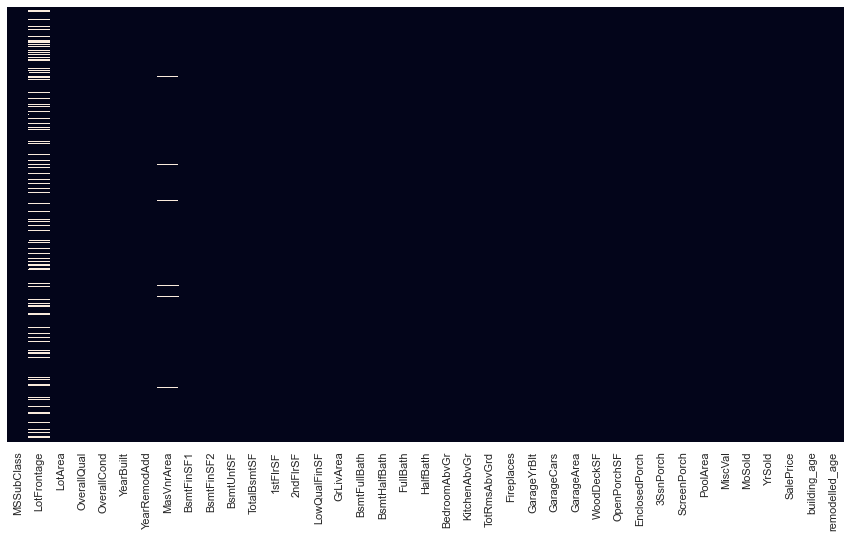

In [75]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [76]:
dup=df.duplicated()
dup.sum()

0

In [77]:
df.shape

(1460, 39)

In [78]:
md1=df["LotFrontage"].median()
md2=df["MasVnrArea"].median()
df["LotFrontage"].replace(np.nan,md1,inplace=True)
df["MasVnrArea"].replace(np.nan,md2,inplace=True)

<AxesSubplot:>

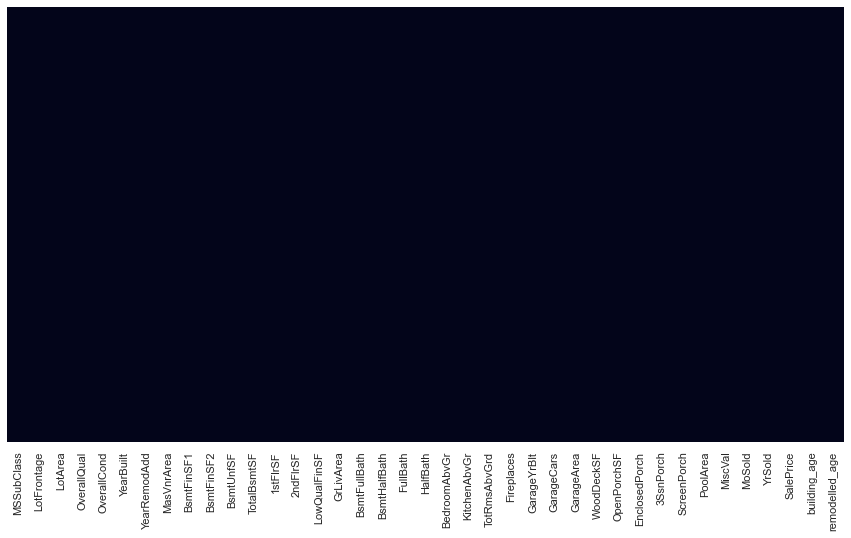

In [79]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from statsmodels.tools.eval_measures import rmse
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop(["SalePrice","building_age"], axis = 1)
X = scaler.fit_transform(x)
Y = df
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [114]:
sgd = SGDRegressor(loss = "squared_loss", alpha = 0.1, max_iter = 1000)

In [115]:
sgd.fit(x_train, y_train.SalePrice)
y_sgd_pred_log = sgd.predict(x_test)
r_sgd_log = sgd.score(x_train,y_train.SalePrice)
print("R-squared = ", r_sgd_log)
y_sgd_pred_exp = np.exp(y_sgd_pred_log)
rmse_sgd_log = rmse(y_sgd_pred_exp,y_test.building_age) 
print("Rmse = ", rmse_sgd_log)

R-squared =  0.6388345129596228
Rmse =  inf


<ipython-input-115-6a39029b26e1>:5: RuntimeWarning: overflow encountered in exp
  y_sgd_pred_exp = np.exp(y_sgd_pred_log)


In [116]:
ols = LinearRegression()
ols.fit(x_train, y_train.SalePrice)
y_ols_pred_log = ols.predict(x_test)
r_ols_log = ols.score(x_train,y_train.SalePrice)
print("R-squared = ", r_ols_log)
y_ols_pred_exp = np.exp(y_ols_pred_log)
rmse_ols_log = rmse(y_ols_pred_exp,y_test.building_age)
print("Rmse = ", rmse_ols_log)

R-squared =  0.8104176374897838
Rmse =  inf


<ipython-input-116-7cb8d267fbe1>:6: RuntimeWarning: overflow encountered in exp
  y_ols_pred_exp = np.exp(y_ols_pred_log)


In [117]:
ols.fit(x_train, y_train.SalePrice)
y_ols_pred_normal = ols.predict(x_test)
r_ols_normal = ols.score(x_train,y_train.SalePrice)
print("R-squared = ", r_ols_normal)
rmse_ols_normal = rmse(y_ols_pred_exp,y_test.SalePrice)
print("Rmse = ", rmse_ols_normal)

R-squared =  0.8104176374897838
Rmse =  inf


In [119]:
sgd.fit(x_train, y_train.SalePrice)
y_sgd_pred_normal = sgd.predict(x_test)
r_sgd_normal = sgd.score(x_train,y_train.SalePrice)
print("R-squared = ", r_sgd_normal)
rmse_sgd_normal = rmse(y_sgd_pred_normal,y_test.SalePrice)
print("Rmse = ", rmse_sgd_normal)

R-squared =  0.6417092299380713
Rmse =  45466.04195985081


In [120]:
model_summary = {"Model": ["SGD Log Model", "SGD Normal Model",
                           "OLS Log Model", "OLS Normal Model"],
                "R-Squared": [r_sgd_log,r_sgd_normal,r_ols_log,r_ols_normal],
                "Rmse":[rmse_sgd_log,rmse_sgd_normal,rmse_ols_log,rmse_ols_normal]}
pd.DataFrame(model_summary)

Model  R-Squared         Rmse
0     SGD Log Model   0.638835          inf
1  SGD Normal Model   0.641709  45466.04196
2     OLS Log Model   0.810418          inf
3  OLS Normal Model   0.810418          inf